# Note - This Is Interactive Data Analysis.***************************

### Introduction

<img src=https://i.imgur.com/k38RuqG.jpg>

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 
While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

In [1]:
%pip install --upgrade plotly
%pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"

## Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from collections import Counter

## Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [5]:
df_hh_income = pd.read_csv('../DATASETS/Median_Household_Income_2015.csv', encoding="windows-1252") # Household Income
df_pct_poverty = pd.read_csv('../DATASETS/Pct_People_Below_Poverty_Level.csv', encoding="windows-1252") # Poverty Rate
df_pct_completed_hs = pd.read_csv('../DATASETS/Pct_Over_25_Completed_High_School.csv', encoding="windows-1252") # High School Completed
df_share_race_city = pd.read_csv('../DATASETS/Share_of_Race_By_City.csv', encoding="windows-1252") # Race(black,white etc) share in City
df_fatalities = pd.read_csv('../DATASETS/Deaths_by_Police_US.csv', encoding="windows-1252") # Kill cases by Police

In [6]:
df_hh_income.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [7]:
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [8]:
df_pct_completed_hs

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


In [9]:
df_share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.20,30.20,0.00,0.00,1.60
1,AL,Abbeville city,54.40,41.40,0.10,1.00,3.10
2,AL,Adamsville city,52.30,44.90,0.50,0.30,2.30
3,AL,Addison town,99.10,0.10,0.00,0.10,0.40
4,AL,Akron town,13.20,86.50,0.00,0.00,0.30
...,...,...,...,...,...,...,...
29261,WY,Woods Landing-Jelm CDP,95.90,0.00,0.00,2.10,0.00
29262,WY,Worland city,89.90,0.30,1.30,0.60,16.60
29263,WY,Wright town,94.50,0.10,1.40,0.20,6.20
29264,WY,Yoder town,97.40,0.00,0.00,0.00,4.00


In [10]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2/1/2015,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2/1/2015,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,3/1/2015,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,4/1/2015,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,4/1/2015,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


# Preliminary Data Exploration


In [11]:
df_pct_poverty.shape

(29329, 3)

In [12]:
df_pct_poverty.isna().values.any()

False

In [13]:
df_share_race_city.isna().values.any()

False

In [14]:
df_pct_poverty.duplicated().value_counts()
df_share_race_city.duplicated().value_counts()

False    29266
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates


In [15]:
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].str.replace('-','0')


In [16]:
df_pct_completed_hs['percent_completed_hs']= df_pct_completed_hs['percent_completed_hs'].str.replace('-','0')

In [17]:
df_pct_poverty['poverty_rate'] =pd.to_numeric(df_pct_poverty['poverty_rate'])
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'])

# Poverty Rate in each US State


In [18]:
df_pct_poverty

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.80
1,AL,Abbeville city,29.10
2,AL,Adamsville city,25.50
3,AL,Addison town,30.70
4,AL,Akron town,42.00
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,18.60
29325,WY,Worland city,15.30
29326,WY,Wright town,5.90
29327,WY,Yoder town,5.40


In [19]:
poverty =df_pct_poverty[['Geographic Area', 'poverty_rate']].groupby(['Geographic Area']).mean()
poverty

,poverty_rate
Geographic Area,
AK,18.68
AL,20.61
AR,22.96
AZ,25.27
CA,16.89
CO,13.19
CT,9.14
DC,18.00
DE,12.56


In [20]:
poverty_rate_mean = poverty['poverty_rate'].mean()
poverty_rate_mean

16.120463328065163

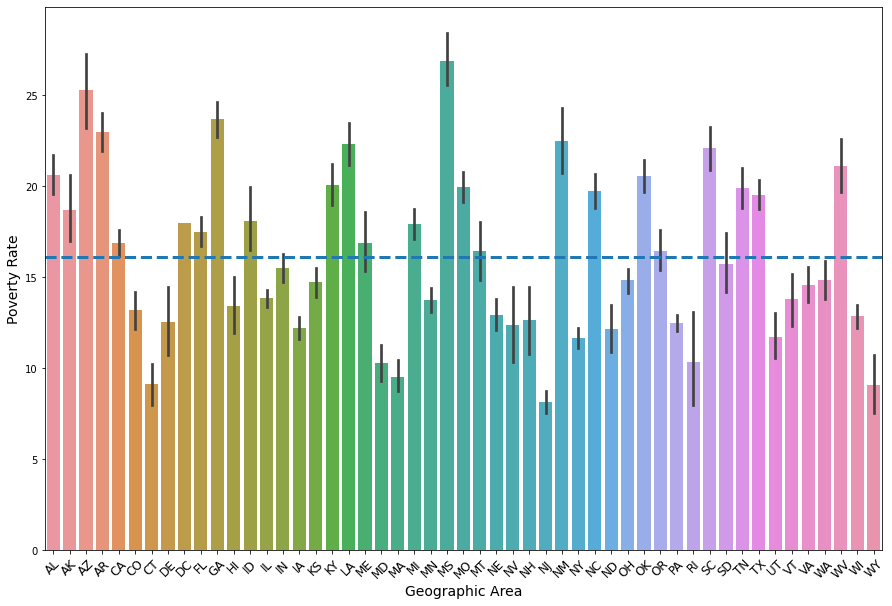

In [21]:
plt.figure(figsize=(15,10))
sns.barplot(data=df_pct_poverty, x='Geographic Area', y='poverty_rate')
plt.xlabel('Geographic Area',fontsize=14)
plt.ylabel('Poverty Rate',fontsize=14)
plt.xticks(fontsize=12,rotation=45);
plt.axhline(y=poverty_rate_mean, ls='--', lw='3') # poverty_rate_mean with dotted line

# Chart the High School Graduation Rate by US State

In [22]:
df_pct_completed_hs # High School Graduation Rate US States

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.20
1,AL,Abbeville city,69.10
2,AL,Adamsville city,78.90
3,AL,Addison town,81.40
4,AL,Akron town,68.60
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100.00
29325,WY,Worland city,85.60
29326,WY,Wright town,89.20
29327,WY,Yoder town,79.40


In [23]:
df_pct_completed_hs.sort_values('percent_completed_hs') # High School Graduation Rate in ascending order of US States

,Geographic Area,City,percent_completed_hs
25237,TX,Indio CDP,0.00
25464,TX,Los Lobos CDP,0.00
25457,TX,Los Corralitos CDP,0.00
25456,TX,Los Centenarios CDP,0.00
25452,TX,Los Angeles CDP,0.00
...,...,...,...
3826,CO,Sawpit town,100.00
23916,SD,Lily town,100.00
23920,SD,Loomis CDP,100.00
3820,CO,St. Mary's CDP,100.00


In [24]:
high_school=df_pct_completed_hs[['Geographic Area', 'percent_completed_hs']].groupby(['Geographic Area']).mean()
high_school.sort_values('percent_completed_hs', ascending= False) # High School Graduation Rate grouped by US States

,percent_completed_hs
Geographic Area,
MA,92.03
HI,91.67
CT,91.59
ME,91.43
NH,90.71
NY,90.54
NJ,90.52
WI,90.26
MT,89.99


In [25]:
state = high_school['percent_completed_hs'].idxmax()
percentage = high_school['percent_completed_hs'].max()
print(f'The Highest Graduation Rate is {round(percentage,2)} in {state} State of US.')

The Highest Graduation Rate is 92.03 in MA State of US.


In [26]:
state = high_school['percent_completed_hs'].idxmin()
percentage = high_school['percent_completed_hs'].min()
print(f'The Highest Graduation Rate is {round(percentage,2)} in {state} State of US.')

The Highest Graduation Rate is 74.09 in TX State of US.


# Visualise the Relationship between Poverty Rates and High School Graduation Rates  

In [27]:
poverty

,poverty_rate
Geographic Area,
AK,18.68
AL,20.61
AR,22.96
AZ,25.27
CA,16.89
CO,13.19
CT,9.14
DC,18.00
DE,12.56


In [28]:
high_school

,percent_completed_hs
Geographic Area,
AK,80.10
AL,80.16
AR,79.95
AZ,79.22
CA,80.82
CO,88.93
CT,91.59
DC,89.30
DE,88.52


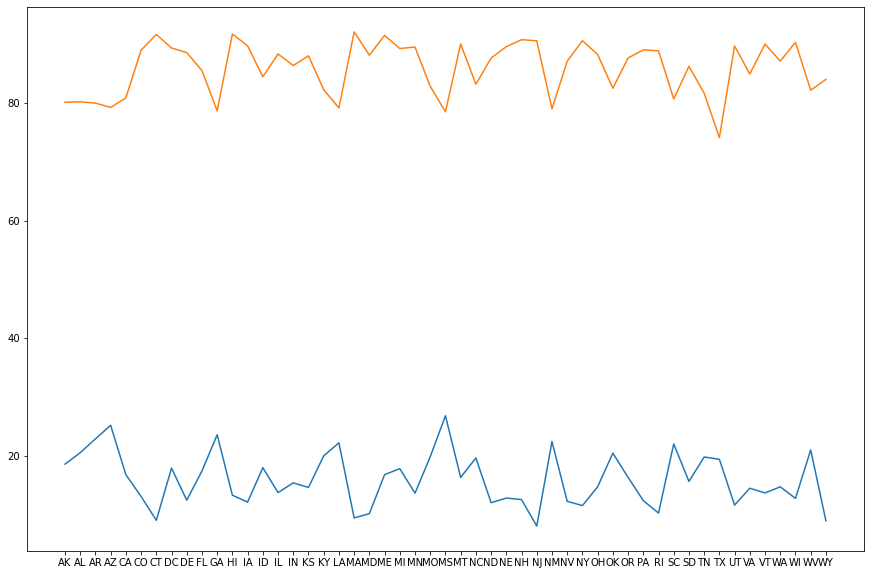

In [29]:
plt.figure(figsize=(15,10))
plt.plot(poverty.index,poverty['poverty_rate'] )
plt.plot(high_school.index, high_school['percent_completed_hs']) 

# line chart with two y-axes to show if the rations of poverty and high school graduation move together.

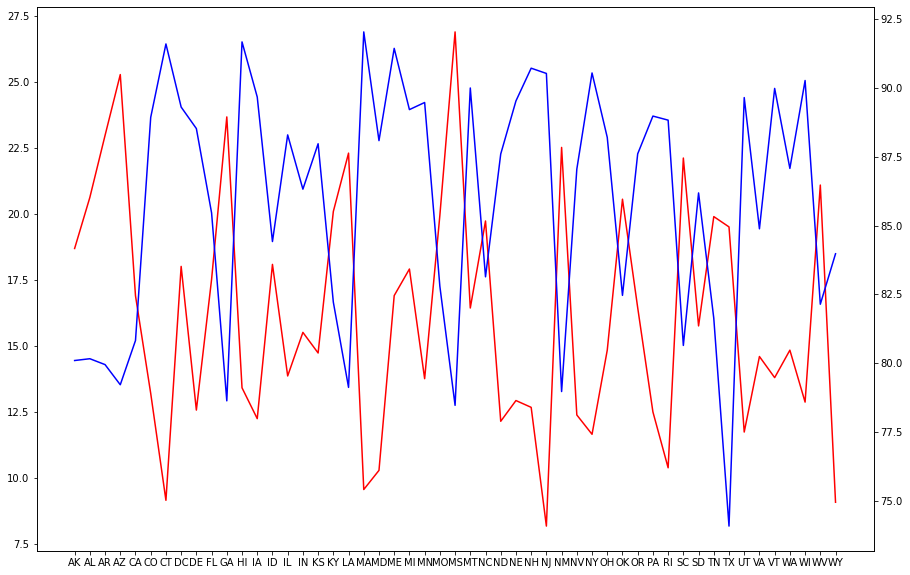

In [30]:
plt.figure(figsize=(15,10))
ax1= plt.gca() # current_axis
ax2= ax1.twinx()
ax1.plot(poverty.index,poverty['poverty_rate'] ,color ='red')
ax2.plot(high_school.index, high_school['percent_completed_hs'], color='blue')

#rations of poverty and high school graduation move together BUT in inverse direction

In [31]:
merged_p_hs = pd.merge(poverty, high_school, on='Geographic Area', how='inner') 
merged_p_hs # merged Poverty Rate and High School Graduate

,poverty_rate,percent_completed_hs
Geographic Area,,
AK,18.68,80.10
AL,20.61,80.16
AR,22.96,79.95
AZ,25.27,79.22
CA,16.89,80.82
CO,13.19,88.93
CT,9.14,91.59
DC,18.00,89.30
DE,12.56,88.52


#### Scatter plot with a Kernel Density Estimate (KDE)  to visualise the same relationship

<Figure size 1080x720 with 0 Axes>

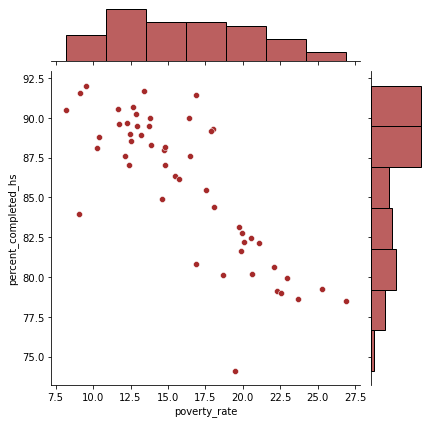

In [32]:
plt.figure(figsize=(15,10))
sns.jointplot(data=merged_p_hs, x='poverty_rate', y='percent_completed_hs',color='brown')

#### Linear regression between the poverty ratio and the high school graduation ratio. 

<Figure size 1080x720 with 0 Axes>

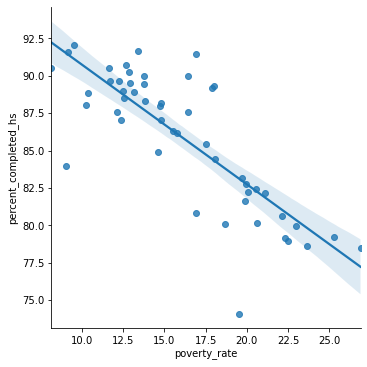

In [33]:
plt.figure(figsize=(15,10))
sns.lmplot(data=merged_p_hs, x='poverty_rate', y='percent_completed_hs')

Text(0, 0.5, 'High School %')

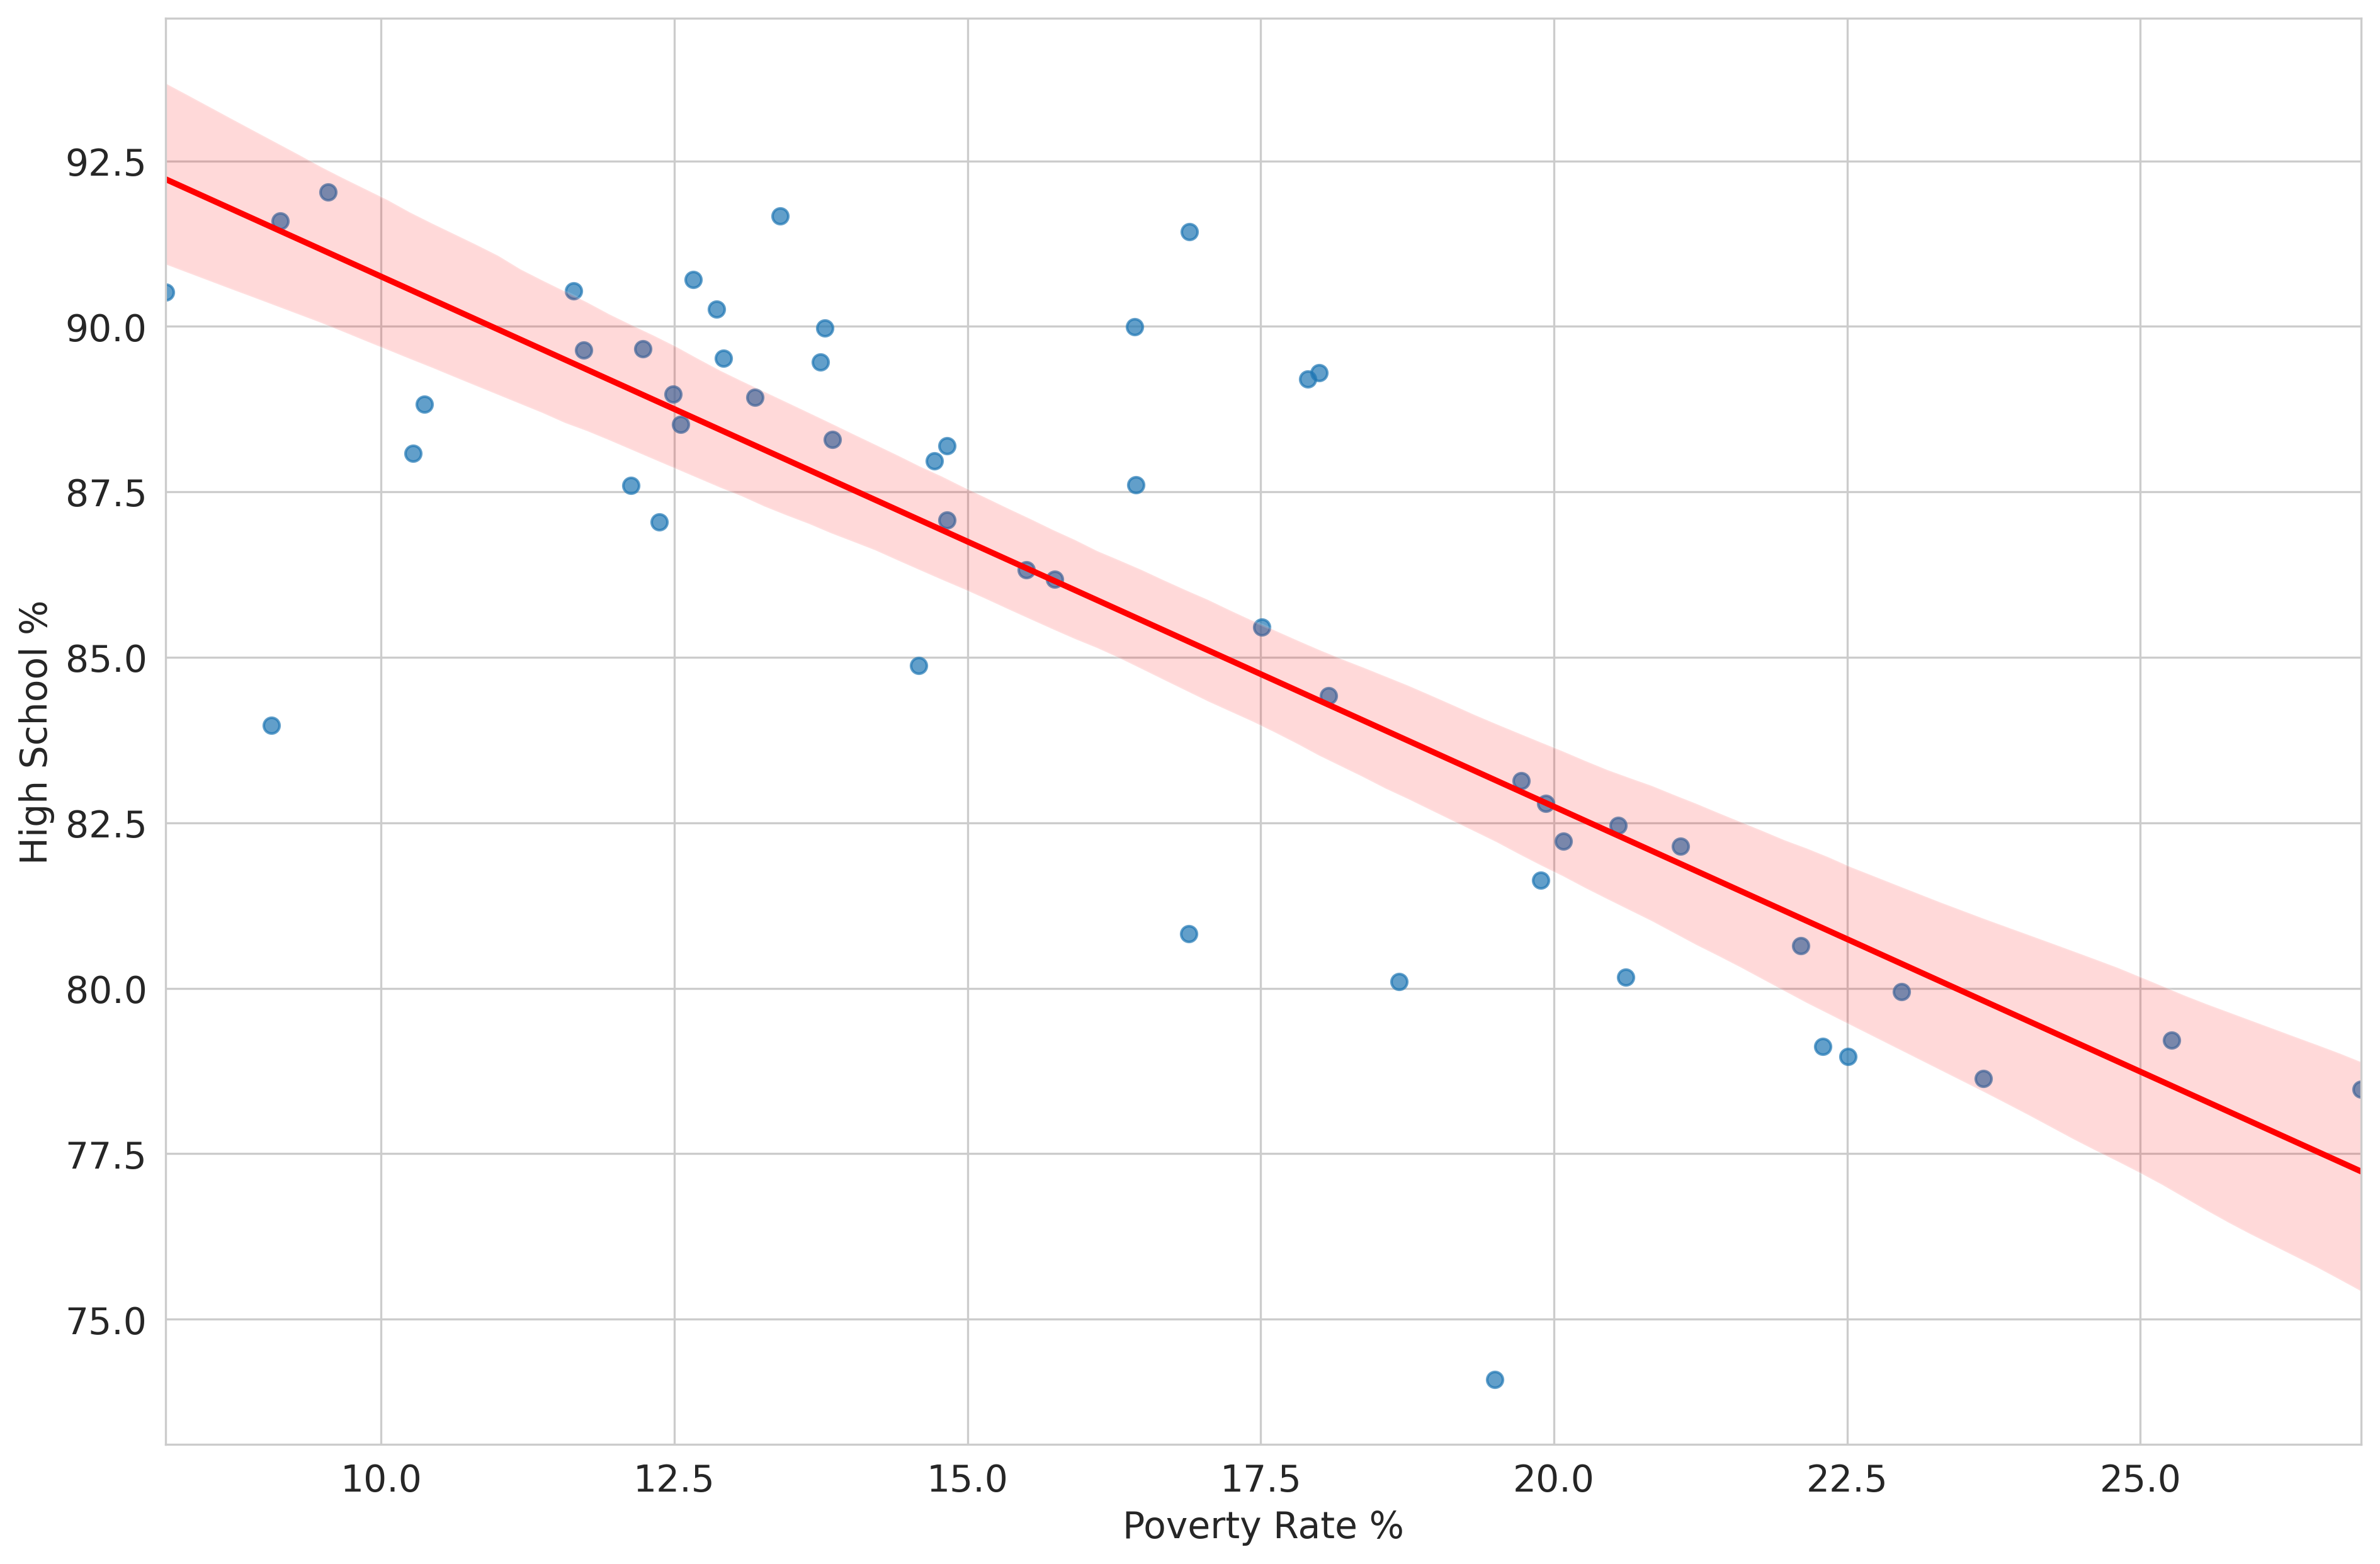

In [34]:
plt.figure(figsize=(15,10),dpi=300)
with sns.axes_style('whitegrid') as ax:
    ax=sns.regplot(data=merged_p_hs, x='poverty_rate', y='percent_completed_hs',scatter_kws={'alpha':0.7},line_kws={'color':'red'})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Poverty Rate %',fontsize=14)
plt.ylabel('High School %',fontsize=14)

# Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [35]:
df_share_race_city.describe()

,share_white,share_black,share_native_american,share_asian,share_hispanic
count,"29,266.00","29,266.00","29,266.00","29,266.00","29,266.00"
mean,83.16,6.83,2.87,1.54,9.32
std,21.75,15.62,12.67,4.29,17.58
min,0.00,0.00,0.00,0.00,0.00
25%,78.50,0.10,0.10,0.00,1.20
50%,92.50,0.80,0.30,0.40,2.90
75%,96.90,4.20,0.90,1.20,8.00
max,100.00,100.00,100.00,67.10,100.00


In [36]:
race_city=df_share_race_city.groupby(['Geographic area']).sum()
race_city

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
AK,"16,068.80",199.70,"16,144.40",488.70,756.50
AL,"41,909.20","13,480.30",381.10,277.30,"1,722.50"
AR,"42,441.20","8,816.60",411.10,258.10,"2,311.70"
AZ,"27,028.00",430.50,"12,894.00",327.70,"9,085.20"
CA,"108,949.30","4,081.10","2,612.20","8,441.40","44,949.20"
CO,"40,197.90",420.30,744.20,528.90,"8,197.60"
CT,"12,313.10",713.90,93.90,427.50,"1,140.50"
DC,38.50,50.70,0.30,3.50,9.10
DE,"5,794.70","1,169.90",39.80,152.00,563.70


In [37]:
fig = px.bar(race_city,width=1000,height=500,) # Total share of race per city
fig.update_xaxes(tickangle = -45)
fig.show()

# Donut Chart by of People Killed by Race

In [38]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2/1/2015,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2/1/2015,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,3/1/2015,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,4/1/2015,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,4/1/2015,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [39]:
df_fatalities['race_name'] = df_fatalities['race'].map({'A':'Asian',
                                                        'B':'Black',
                                                        'H':'Hispanic',
                                                        'W':'White', 
                                                        'N':'Native American',
                                                        'O': 'Others'
                                                       })
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,race_name
0,3,Tim Elliot,2/1/2015,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,Asian
1,4,Lewis Lee Lembke,2/1/2015,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,White
2,5,John Paul Quintero,3/1/2015,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,Hispanic
3,8,Matthew Hoffman,4/1/2015,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,White
4,9,Michael Rodriguez,4/1/2015,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,Hispanic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False,NaN
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False,NaN
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False,NaN
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True,Black


In [40]:
killed_by_race=df_fatalities['race_name'].value_counts()
killed_by_race 

White              1201
Black               618
Hispanic            423
Asian                39
Native American      31
Others               28
Name: race_name, dtype: int64

In [41]:
px.pie(killed_by_race, names=killed_by_race.index, values=killed_by_race.values,hole=0.5)

# Chart Comparing the Total Number of Deaths of Men and Women

In [42]:
df_fatalities['gender'].value_counts()


M    2428
F     107
Name: gender, dtype: int64

# Box Plot Showing the Age and Manner of Death
#### Is there a difference between men and women in the manner of death? 

In [43]:
df_fatalities=df_fatalities.dropna()


In [44]:
df_fatalities.isna().values.any()

False

In [45]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,race_name
0,3,Tim Elliot,2/1/2015,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,Asian
1,4,Lewis Lee Lembke,2/1/2015,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,White
2,5,John Paul Quintero,3/1/2015,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,Hispanic
3,8,Matthew Hoffman,4/1/2015,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,White
4,9,Michael Rodriguez,4/1/2015,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,Hispanic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,Aries Clark,25/07/17,shot,undetermined,16.00,M,B,Marion,AR,False,undetermined,Not fleeing,False,Black
2523,2808,Kesharn K. Burney,26/07/17,shot,vehicle,25.00,M,B,Dayton,OH,False,attack,Car,False,Black
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.00,M,B,Homer,LA,False,attack,Car,False,Black
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True,Black


In [46]:
male_death=df_fatalities[df_fatalities['gender']=='M']

In [47]:
female_death=df_fatalities[df_fatalities['gender']=='F']

In [48]:
death_manners = df_fatalities.groupby(['gender','manner_of_death', 'age'],as_index=False).agg({'id':pd.Series.count})
death_manners

,gender,manner_of_death,age,id
0,F,shot,12.00,1
1,F,shot,17.00,3
2,F,shot,20.00,1
3,F,shot,21.00,3
4,F,shot,22.00,1
...,...,...,...,...
158,M,shot and Tasered,60.00,1
159,M,shot and Tasered,63.00,3
160,M,shot and Tasered,67.00,1
161,M,shot and Tasered,70.00,1


In [49]:
px.box(death_manners, y="age", x="gender", color="manner_of_death")

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying.  

In [50]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,race_name
0,3,Tim Elliot,2/1/2015,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,Asian
1,4,Lewis Lee Lembke,2/1/2015,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,White
2,5,John Paul Quintero,3/1/2015,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,Hispanic
3,8,Matthew Hoffman,4/1/2015,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,White
4,9,Michael Rodriguez,4/1/2015,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,Hispanic


#### How many of the people killed by police were armed with guns versus unarmed?

In [51]:
armed_df = df_fatalities[(df_fatalities.armed == 'gun') | (df_fatalities.armed=='unarmed')]
gun_vs_armed = armed_df.groupby('armed', as_index=False).agg({'id':pd.Series.count})
gun_vs_armed

,armed,id
0,gun,1247
1,unarmed,165


Text(0, 0.5, 'No. of People Killed')

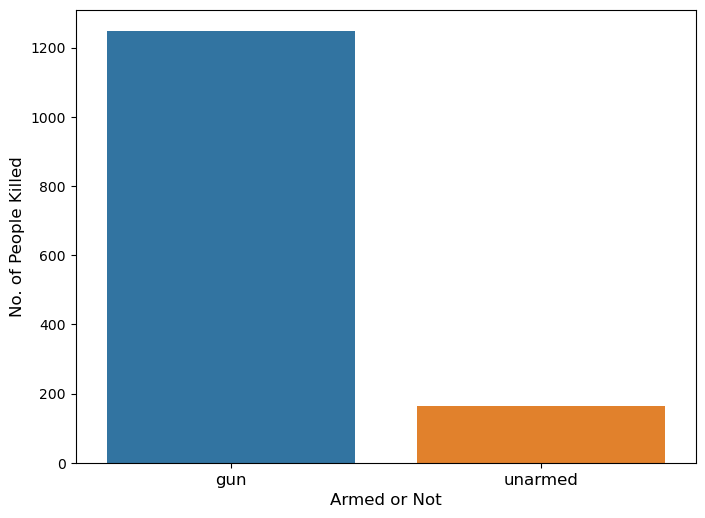

In [52]:
plt.figure(figsize=(8,6),dpi=100)
sns.barplot(data=gun_vs_armed, x='armed',y='id')
plt.xticks(fontsize=12)
plt.xlabel('Armed or Not',fontsize=12)
plt.ylabel('No. of People Killed',fontsize=12)

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [53]:
under25 = df_fatalities[df_fatalities['age']<25].count().id
print(f'There were {under25} people killed which were under 25 years old')

There were 422 people killed which were under 25 years old


In [54]:
over25 = df_fatalities[df_fatalities['age']>=25].count().id
print(f'There were {over25} people killed which were over 25 years old')

There were 1832 people killed which were over 25 years old


In [55]:
total_people_by_age = under25 + over25
total_people_by_age

2254

In [56]:
under_25_pct = round(under25 / total_people_by_age *100)
print(f'The percentage of people killed were under 25 years old is {under_25_pct}%')

The percentage of people killed were under 25 years old is 19%


In [57]:
over_25_pct = round(over25 / total_people_by_age *100)
print(f'The percentage of people killed were over 25 years old is {over_25_pct}%')

The percentage of people killed were over 25 years old is 81%


#### Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

In [58]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,race_name
0,3,Tim Elliot,2/1/2015,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,Asian
1,4,Lewis Lee Lembke,2/1/2015,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,White
2,5,John Paul Quintero,3/1/2015,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,Hispanic
3,8,Matthew Hoffman,4/1/2015,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,White
4,9,Michael Rodriguez,4/1/2015,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,Hispanic


In [59]:
age_0plus = df_fatalities[df_fatalities['age']>0]
age_0plus

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,race_name
0,3,Tim Elliot,2/1/2015,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,Asian
1,4,Lewis Lee Lembke,2/1/2015,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,White
2,5,John Paul Quintero,3/1/2015,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,Hispanic
3,8,Matthew Hoffman,4/1/2015,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,White
4,9,Michael Rodriguez,4/1/2015,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,Hispanic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,Aries Clark,25/07/17,shot,undetermined,16.00,M,B,Marion,AR,False,undetermined,Not fleeing,False,Black
2523,2808,Kesharn K. Burney,26/07/17,shot,vehicle,25.00,M,B,Dayton,OH,False,attack,Car,False,Black
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.00,M,B,Homer,LA,False,attack,Car,False,Black
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True,Black


In [60]:
age_killed=age_0plus.groupby(['age'],as_index=False).agg({'id':pd.Series.count})
age_killed

,age,id
0,6.00,1
1,12.00,1
2,13.00,1
3,14.00,1
4,15.00,7
...,...,...
67,79.00,1
68,80.00,1
69,82.00,1
70,83.00,2


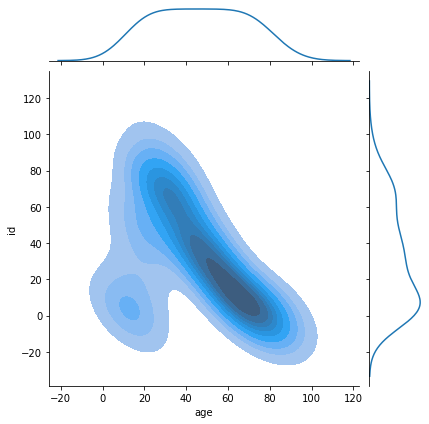

In [61]:
sns.jointplot(data=age_killed, x='age',y='id',kind='kde',shade=True)

#### Create a seperate KDE plot for each race. Is there a difference between the distributions? 

In [62]:
race_death = df_fatalities.groupby(['race_name','age'],as_index=False).agg({'id':pd.Series.count})
race_death

,race_name,age,id
0,Asian,15.00,1
1,Asian,18.00,2
2,Asian,20.00,1
3,Asian,25.00,1
4,Asian,26.00,1
...,...,...,...
237,White,76.00,4
238,White,79.00,1
239,White,82.00,1
240,White,83.00,2


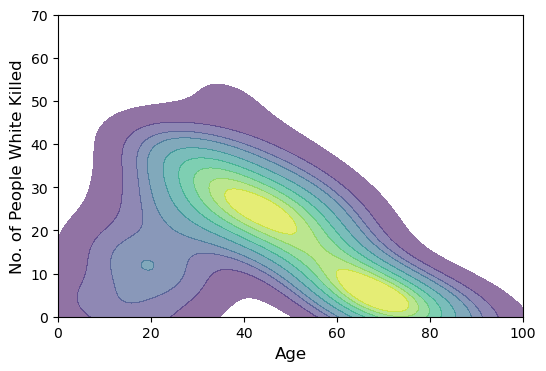

In [63]:
plt.figure(figsize=(6,4),dpi=100)
race_death_W = race_death[race_death['race_name']=="White"]
sns.kdeplot(x=race_death_W['age'], y= race_death_W['id'], shade=True, cmap='viridis',alpha=0.6)
plt.ylim(0,70)
plt.xlim(0,100)
plt.xlabel('Age',fontsize=12)
plt.ylabel('No. of People White Killed',fontsize=12);

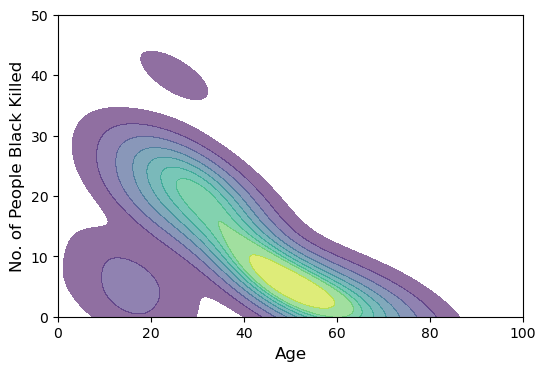

In [64]:
plt.figure(figsize=(6,4),dpi=100)
race_death_B = race_death[race_death['race_name']=="Black"]
sns.kdeplot(x=race_death_B['age'], y= race_death_B['id'], shade=True, cmap='viridis',alpha=0.6)
plt.ylim(0,50)
plt.xlim(0,100)
plt.xlabel('Age',fontsize=12)
plt.ylabel('No. of People Black Killed',fontsize=12);

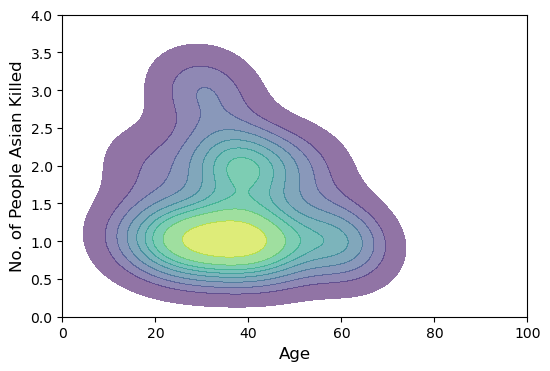

In [65]:
plt.figure(figsize=(6,4),dpi=100)
race_death_A = race_death[race_death['race_name']=="Asian"]
sns.kdeplot(x=race_death_A['age'], y= race_death_A['id'], shade=True, cmap='viridis',alpha=0.6)
plt.ylim(0,4)
plt.xlim(0,100)
plt.xlabel('Age',fontsize=12)
plt.ylabel('No. of People Asian Killed',fontsize=12);

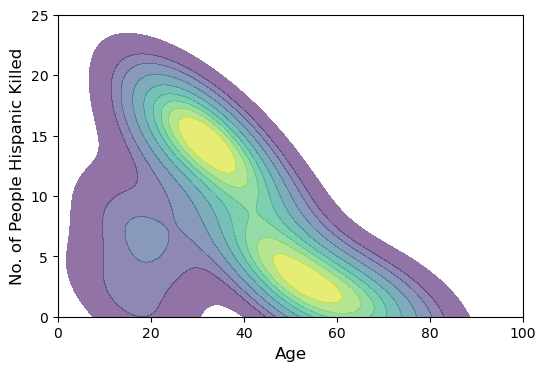

In [66]:
plt.figure(figsize=(6,4),dpi=100)
race_death_H = race_death[race_death['race_name']=="Hispanic"]
sns.kdeplot(x=race_death_H['age'], y= race_death_H['id'], shade=True, cmap='viridis',alpha=0.6)
plt.ylim(0,25)
plt.xlim(0,100)
plt.xlabel('Age',fontsize=12)
plt.ylabel('No. of People Hispanic Killed',fontsize=12);

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [67]:
killed_by_race = df_fatalities.groupby(['race_name'],as_index=False).agg({'id':pd.Series.count}).sort_values('id')
killed_by_race

,race_name,id
4,Others,28
3,Native American,29
0,Asian,36
2,Hispanic,401
1,Black,592
5,White,1168


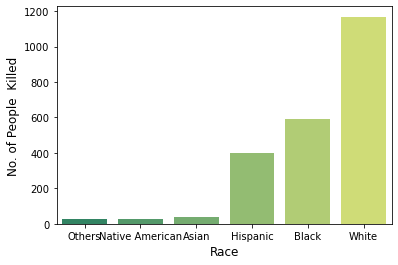

In [68]:

sns.barplot(data=killed_by_race, x='race_name', y=killed_by_race['id'],palette='summer')
plt.xlabel('Race',fontsize=12);
plt.ylabel('No. of People  Killed',fontsize=12);


# In Which Cities Do the Most Police Killings Take Place?

#### Top 10 cities with the most police killings. Which cities are the most dangerous?  

In [69]:
killing_by_cities = df_fatalities.groupby(['city'],as_index=False).agg({'id':pd.Series.count}).sort_values('id',ascending=True)[-10:]
killing_by_cities.columns=['City', 'No of People Killed']
killing_by_cities

,City,No of People Killed
1095,St. Louis,14
723,Miami,15
1003,San Antonio,15
254,Columbus,16
619,Las Vegas,17
57,Austin,18
212,Chicago,22
518,Houston,24
895,Phoenix,28
658,Los Angeles,35


<AxesSubplot:xlabel='City', ylabel='No of People Killed'>

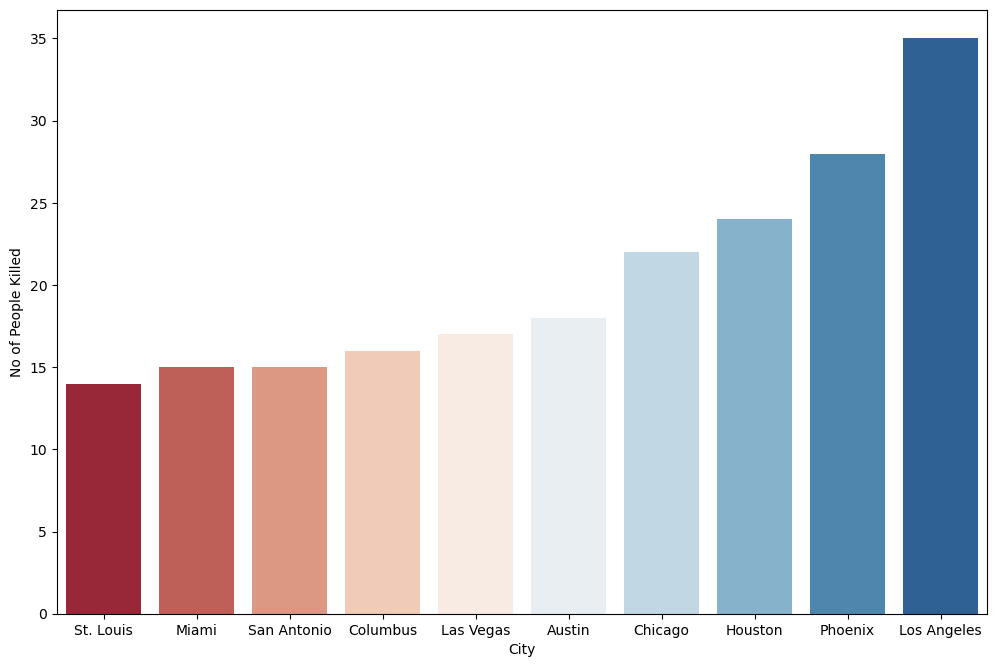

In [70]:
plt.figure(figsize=(12,8),dpi=100)
sns.barplot(data= killing_by_cities,x='City', y='No of People Killed',palette='RdBu' )

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time 

In [71]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

<ipython-input-71-ea1695318982>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
type(df_fatalities['date'])

pandas.core.series.Series

In [73]:
killing_over_time=df_fatalities.groupby('date',as_index=False).agg({'id':pd.Series.count})
killing_over_time

,date,id
0,2015-01-03,3
1,2015-01-04,2
2,2015-01-06,1
3,2015-01-07,2
4,2015-01-08,1
...,...,...
841,2017-12-02,2
842,2017-12-03,2
843,2017-12-04,1
844,2017-12-05,3


In [74]:
killing_over_time_ma = killing_over_time['id'].rolling(window=180).mean() # Moving Average of 180 days

In [75]:
px.line(x=killing_over_time['date'],y=killing_over_time_ma)

# Result
***Police Killing trend is Downward from so many years***

# Choropleth Map of Police Killings by US State


In [76]:
killing_by_states = df_fatalities.groupby(['state'],as_index=False).agg({'id':pd.Series.count}).sort_values('id',ascending=False)
killing_by_states.columns=['State', 'No of People Killed']
killing_by_states

,State,No of People Killed
4,CA,366
43,TX,200
9,FL,136
3,AZ,105
35,OH,70
27,NC,66
36,OK,65
5,CO,63
10,GA,61
24,MO,58


In [77]:
# Choropleth map with plotly.express
fig = px.choropleth(killing_by_states,
              locations='State',
              color= 'No of People Killed',
              locationmode='USA-states',
              color_continuous_scale='spectral_r',
              scope ='usa')

# Add Abbreviated State labels
fig.add_scattergeo(
    locations=killing_by_states['State'],
    locationmode='USA-states',
    text=killing_by_states['State'],
    mode='text')

# Add Title 
fig.update_layout(
    title={'text':'Police Killings by US State',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})
fig.show()

### In case above interactive image doesnot display
<img src=https://i.imgur.com/OhJUxNK.jpg>


# THANK YOU